In [219]:
#import required libraries
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
# for standarization of numeric column in data frame
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [220]:
import seaborn as sns

In [221]:
#reading the file 
df = pd.read_csv("Customer_master_churn_new.csv")

In [222]:
# do a eye viw of imported data
df.head(5)

,Customer_Id,No_Of_Purchases,Income,Sale_value,First_Name,Last_Name,Age,Gender,Maritial_Status,No_Of_Childern,Profession,Education,Address_2,City,Country,Churn
0,1305,2,High,10133,Ebony,Kumar,36,Female,Married,1,Public Relations,Graduate,ML,Shillong,India,0
1,1461,2,High,10390,Dane,Ismail,44,NaN,Divorced,2,Payroll,Graduate,Jammu and Kashmir,Jammu,India,0
2,1470,1,Low,1051,Dolan,Patel,12,Male,Single,0,Student,Others,Kerala,Kollam,India,0
3,1346,2,Low,10559,Dale,Patel,75,Male,Others,2,Customer Service,Under Graduate,Assam,Silchar,India,1
4,1388,2,Low,10564,Xyla,Singh,17,NaN,Single,0,Student,PUC\XII,Rajasthan,Jaipur,India,1


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 16 columns):
Customer_Id        311 non-null int64
No_Of_Purchases    311 non-null int64
Income             311 non-null object
Sale_value         311 non-null int64
First_Name         311 non-null object
Last_Name          311 non-null object
Age                311 non-null int64
Gender             206 non-null object
Maritial_Status    311 non-null object
No_Of_Childern     311 non-null int64
Profession         311 non-null object
Education          311 non-null object
Address_2          311 non-null object
City               311 non-null object
Country            311 non-null object
Churn              311 non-null int64
dtypes: int64(6), object(10)
memory usage: 39.0+ KB


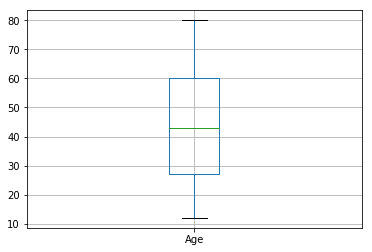

In [224]:
# Age column needs to be checked,lets see its distributon
df.boxplot("Age")
#Looks fine

In [225]:
# Dimension of data set
df.shape

(311, 16)

In [226]:
#lets check the distribution 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer_Id,311.0,1253.594855,142.594971,1001.0,1137.5,1255.0,1369.0,1499.0
No_Of_Purchases,311.0,1.607717,0.819405,1.0,1.0,1.0,2.0,5.0
Sale_value,311.0,8449.115756,5705.124997,367.0,4582.0,7376.0,11106.0,31971.0
Age,311.0,44.295820,19.620659,12.0,27.0,43.0,60.0,80.0
No_Of_Childern,311.0,1.000000,0.946982,0.0,0.0,1.0,2.0,4.0
Churn,311.0,0.440514,0.497249,0.0,0.0,0.0,1.0,1.0


In [227]:
df.head(2)

,Customer_Id,No_Of_Purchases,Income,Sale_value,First_Name,Last_Name,Age,Gender,Maritial_Status,No_Of_Childern,Profession,Education,Address_2,City,Country,Churn
0,1305,2,High,10133,Ebony,Kumar,36,Female,Married,1,Public Relations,Graduate,ML,Shillong,India,0
1,1461,2,High,10390,Dane,Ismail,44,NaN,Divorced,2,Payroll,Graduate,Jammu and Kashmir,Jammu,India,0


In [228]:
#check if any null value is there
df.isnull().sum()

Customer_Id          0
No_Of_Purchases      0
Income               0
Sale_value           0
First_Name           0
Last_Name            0
Age                  0
Gender             105
Maritial_Status      0
No_Of_Childern       0
Profession           0
Education            0
Address_2            0
City                 0
Country              0
Churn                0
dtype: int64

In [229]:
df.groupby('Gender').count()


,Customer_Id,No_Of_Purchases,Income,Sale_value,First_Name,Last_Name,Age,Maritial_Status,No_Of_Childern,Profession,Education,Address_2,City,Country,Churn
Gender,,,,,,,,,,,,,,,
Female,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96
Male,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110


In [230]:
#check the data types of dataframe 
df.dtypes

Customer_Id         int64
No_Of_Purchases     int64
Income             object
Sale_value          int64
First_Name         object
Last_Name          object
Age                 int64
Gender             object
Maritial_Status    object
No_Of_Childern      int64
Profession         object
Education          object
Address_2          object
City               object
Country            object
Churn               int64
dtype: object

In [231]:
#get the overview of object data 
df.describe(include=[np.object])

,Income,First_Name,Last_Name,Gender,Maritial_Status,Profession,Education,Address_2,City,Country
count,311,311,311,206,311,311,311,311,311,311
unique,3,270,7,2,6,16,6,70,138,1
top,Low,Lisandra,Raj,Male,Single,Student,SSLC\X,MH,Imphal,India
freq,184,3,54,110,104,46,61,9,13,311


### We need to focus on High Value Customer Churn, so lets make hypothesis of who can be high value customer
We can assume,High Value customers as those who make more number of purchase, buy at least 2 purhcase and those who make high value purchase.

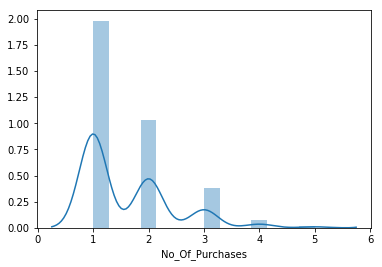

In [232]:
sns.distplot(df["No_Of_Purchases"])

In [233]:
#select the customers who has made purchases more than 2 for high value customers
df2 = df[df["No_Of_Purchases"]>2]

In [234]:
df2.shape

(43, 16)

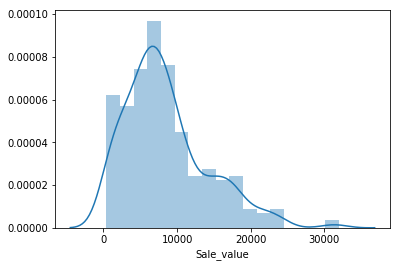

In [235]:
sns.distplot(df["Sale_value"])

In [236]:
#minimum handset price can't be 0,lets impute this
df2.ix[np.abs(df2.Sale_value)==0,"Sale_value"] = np.round(df2.Sale_value.mean()+2*df2.Sale_value.std())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



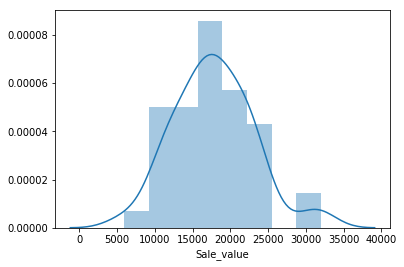

In [237]:
sns.distplot(df2["Sale_value"])

In [238]:
#Store all numerical columns
numericalcolumn = df2.select_dtypes(include = [np.number]).columns

In [239]:
#standarize the data
df_z = df2[numericalcolumn].apply(zscore)

In [240]:
#Lets check the data
df_z.head(5)

,Customer_Id,No_Of_Purchases,Sale_value,Age,No_Of_Childern,Churn
11,0.779490,-0.480537,-1.274073,-0.652374,0.900426,1.072381
12,-0.450028,-0.480537,-1.272545,0.296006,-0.092351,1.072381
13,0.936117,-0.480537,-1.252296,0.445750,1.893204,-0.932505
20,0.074671,-0.480537,-1.150482,-1.500925,-1.085129,1.072381
23,0.152984,-0.480537,-1.123357,1.593790,0.900426,-0.932505


In [241]:
#Heat map for correlation just to know the  quantified relation between the variable
#calculate the correlation matrix
corr = df_z.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)


#draw the correlation table 
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())
# Seems ok to go with

,Customer_Id,No_Of_Purchases,Sale_value,Age,No_Of_Childern,Churn
Customer_Id,1,0.13,0.074,0.044,0.25,-0.084
No_Of_Purchases,0.13,1,0.52,0.014,-0.044,-0.01
Sale_value,0.074,0.52,1,0.32,0.017,0.073
Age,0.044,0.014,0.32,1,0.46,-0.017
No_Of_Childern,0.25,-0.044,0.017,0.46,1,-0.086
Churn,-0.084,-0.01,0.073,-0.017,-0.086,1


### Apply KMeans for different number of clusters to identify the suitable size

In [242]:
cluster_range = range(1,10)
cluster_errors = []
for non_clusters in cluster_range:
    clusters = KMeans(non_clusters, n_init = 5)
    clusters.fit(df_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:10]

,cluster_errors,num_clusters
0,258.000000,1
1,208.767658,2
2,171.828574,3
3,144.267371,4
4,129.258137,5
5,113.833252,6
6,105.501680,7
7,90.394786,8
8,90.643356,9


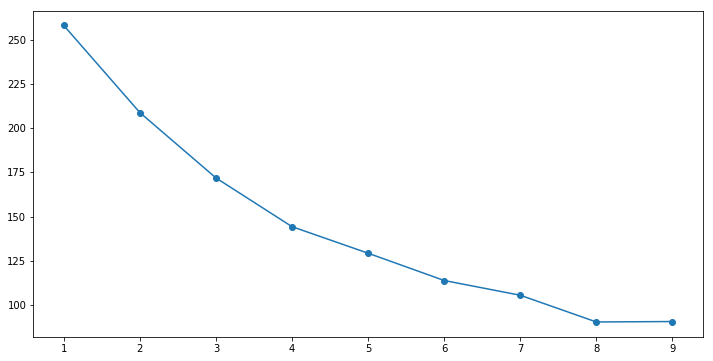

In [243]:
import matplotlib.pyplot as plt
from matplotlib import cm
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

###Lets build KMeans clustering for No.Of Clusters = 4

In [244]:
kmeans = KMeans(n_clusters=4, n_init = 5, random_state=55555)

In [245]:
kmeans.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=55555, tol=0.0001, verbose=0)

In [246]:
predictions = kmeans.predict(df_z)
df2["group"] = predictions
df2.head(5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Customer_Id,No_Of_Purchases,Income,Sale_value,First_Name,Last_Name,Age,Gender,Maritial_Status,No_Of_Childern,Profession,Education,Address_2,City,Country,Churn,group
11,1381,3,Low,11124.0,Aidan,Khan,32,Male,Others,2,Accounting,SSLC\X,Arunachal Pradesh,Itanagar,India,1,0
12,1224,3,High,11132.0,Wayne,Raj,51,NaN,Divorced,1,Tech Support,Post Graduate,GA,Panjim,India,1,0
13,1401,3,High,11238.0,Shad,Kumar,54,NaN,Married,3,Research and Development,Others,Daman and Diu,Daman,India,0,2
20,1291,3,Low,11771.0,Malachi,Singh,15,Male,Single,0,Student,SSLC\X,Assam,Guwahati,India,1,3
23,1301,3,Low,11913.0,Quail,Khan,77,Female,Divorced,2,Payroll,SSLC\X,GJ,Bharuch,India,0,2


In [247]:
!pip install plotly


In [248]:
#Lets do profiling for high value cumtomers
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True) #Plotly offline
from plotly.graph_objs import *

trace0 =  go.Box(
    y=df2.loc[df2["group"]==0,"No_Of_Purchases"]
)
trace1 =  go.Box(
    y=df2.loc[df2["group"]==1,"No_Of_Purchases"]
)
trace2 =  go.Box(
    y=df2.loc[df2["group"]==2,"No_Of_Purchases"]
)
trace3 =  go.Box(
    y=df2.loc[df2["group"]==3,"No_Of_Purchases"]
)

data = [trace0,trace1]
fig = tools.make_subplots(rows=1, cols=4)

fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)
fig.append_trace(trace2,1,3)
fig.append_trace(trace3,1,4)


fig['layout'].update(title='No_Of_Purchases')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]  [ (1,4) x4,y4 ]



In [250]:
trace0 =  go.Box(
    y=df2.loc[df2["group"]==0,"Sale_value"]
)
trace1 =  go.Box(
    y=df2.loc[df2["group"]==1,"Sale_value"]
)
trace2 =  go.Box(
    y=df2.loc[df2["group"]==2,"Sale_value"]
)
trace3 =  go.Box(
    y=df2.loc[df2["group"]==3,"Sale_value"]
)


data = [trace0,trace1,trace2,trace3]
fig = tools.make_subplots(rows=1, cols=4)

fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)
fig.append_trace(trace2,1,3)
fig.append_trace(trace3,1,4)


fig['layout'].update(height=600, width=900, title='Sale_value')
iplot(fig)
# Do this for every variables

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]  [ (1,4) x4,y4 ]



In [269]:
trace0 =  go.Histogram(
    y=df2.loc[df2["group"]==0,"Income"]
)
trace1 =  go.Histogram(
    y=df2.loc[df2["group"]==1,"Income"]
)
trace2 =  go.Histogram(
    y=df2.loc[df2["group"]==2,"Income"]
)
trace3 =  go.Histogram(
    y=df2.loc[df2["group"]==3,"Income"]
)


data = [trace0,trace1,trace2,trace3]
fig = tools.make_subplots(rows=1, cols=4)

fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)
fig.append_trace(trace2,1,3)
fig.append_trace(trace3,1,4)


fig['layout'].update(height=600, width=900, title='Income')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]  [ (1,4) x4,y4 ]



In [287]:
df_highvalue = df2[df2["group"]==0]
dfx = df_highvalue.groupby("Churn").agg({'Churn': 'count'})
np.round(dfx['Churn']/sum(dfx['Churn'])*100,2)

Churn
1    100.0
Name: Churn, dtype: float64

In [281]:
dfx

,Churn
Churn,
0,13


In [285]:
df2[df2["group"]==0]

,Customer_Id,No_Of_Purchases,Income,Sale_value,First_Name,Last_Name,Age,Gender,Maritial_Status,No_Of_Childern,Profession,Education,Address_2,City,Country,Churn,group
11,1381,3,Low,11124.0,Aidan,Khan,32,Male,Others,2,Accounting,SSLC\X,Arunachal Pradesh,Itanagar,India,1,0
12,1224,3,High,11132.0,Wayne,Raj,51,NaN,Divorced,1,Tech Support,Post Graduate,GA,Panjim,India,1,0
39,1340,3,Medium,14475.0,Virginia,Kumar,39,Female,Married,2,Customer Relations,PUC\XII,Sikkim,Gangtok,India,1,0
41,1198,3,Low,14555.0,Jacob,Patel,41,Female,Others,3,Tech Support,SSLC\X,Lakshadweep,Kavaratti,India,1,0
51,1254,3,Low,15497.0,Kameko,Jain,56,Female,Divorced,1,Advertising,SSLC\X,GJ,Gandhinagar,India,1,0
68,1344,3,High,17387.0,Rylee,Ismail,73,Female,Divorced,2,Finances,Graduate,MH,Miraj,India,1,0
69,1497,3,Low,17442.0,Oscar,Jain,53,Male,Others,1,Finances,PUC\XII,Meghalaya,Shillong,India,1,0
87,1177,4,High,19487.0,Delilah,Khan,59,Female,Common-Law,2,Media Relations,Post Graduate,GJ,Anand,India,1,0
88,1466,3,Low,19807.0,Thomas,Jain,48,Female,Married,1,Legal Department,Under Graduate,ML,Shillong,India,1,0
94,1256,3,Low,21130.0,Caldwell,Kumar,72,Female,Married,1,Payroll,Under Graduate,Bihar,Bihar Sharif,India,1,0


From the above analysis, we can infer that following are the target group of customers: 
1.	Customers who make 4,5 purchases are likely to stay
2.	Customers whose income is relatively less since they are mostly students and youngsters.
3.	Customers who have more number of children are likely to stay 
4.	Female customers are likely to leave

Inferring about each group spending & usage pattern. Most members of group 0 are already churned, so better making strategy for this type of group will make sense.
